In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mne.decoding import Vectorizer
from mne.preprocessing import Xdawn
from pyriemann.estimation import XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import moabb
from moabb.analysis.meta_analysis import (  
    compute_dataset_statistics,
    find_significant_differences,
)
from moabb.analysis.plotting import paired_plot, summary_plot
from moabb.datasets import BNCI2014009
from moabb.evaluations import CrossSessionEvaluation
from moabb.paradigms import P300


warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
moabb.set_log_level("info")

In [2]:
dataset = BNCI2014009()
#dataset.subject_list = dataset.subject_list[]
datasets = [dataset]
paradigm = P300()

In [3]:
subject_list = [1]
sessions = dataset.get_data(subject_list)
X, labels, meta = paradigm.get_data(dataset=dataset, subjects=subject_list)
epochs, labels, meta = paradigm.get_data(
    dataset=dataset, subjects=subject_list, return_epochs=True
)

In [4]:
pipeline = {}
pipeline["Riemann"] = make_pipeline(
    XdawnCovariances(nfilter=5, estimator="lwf", xdawn_estimator="scm"),
    TangentSpace(),
    LogisticRegression(penalty="l1", solver="liblinear"),
)
skEval = CrossSessionEvaluation(
    paradigm=paradigm,
    datasets=datasets,
    suffix="examples",
    overwrite=True,
)
results = skEval.process(pipeline)

2022-04-10 16:46:57,191 INFO MainThread moabb.evaluations.base Processing dataset: 009-2014
009-2014-CrossSession:   0%|          | 0/10 [00:00<?, ?it/s]2022-04-10 16:47:01,111 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 1 | session_0: Score 0.948
2022-04-10 16:47:04,646 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 1 | session_1: Score 0.939
2022-04-10 16:47:08,231 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 1 | session_2: Score 0.945
009-2014-CrossSession:  10%|█         | 1/10 [00:11<01:39, 11.05s/it]2022-04-10 16:47:12,351 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 2 | session_0: Score 0.970
2022-04-10 16:47:15,749 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 2 | session_1: Score 0.976
2022-04-10 16:47:19,166 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 2 | session_2: Score 0.967
009-2014-CrossSession:  20%|██        | 2/10 [00:21<01:27, 10.98s/it]2022-04-10 16:47:23,065 INFO MainThread moa

 84%|###############################      | 15.6M/18.5M [00:10<00:00, 5.31MB/s]
 88%|################################4    | 16.3M/18.5M [00:10<00:00, 5.72MB/s]
 92%|#################################8   | 17.0M/18.5M [00:10<00:00, 6.05MB/s]
 95%|###################################3 | 17.7M/18.5M [00:10<00:00, 6.27MB/s]
 99%|####################################7| 18.4M/18.5M [00:10<00:00, 6.34MB/s]
100%|#############################################| 18.5M/18.5M [00:00<?, ?B/s]
SHA256 hash of downloaded file: 3958a8fcfc65255629640a89dcd17cd8f374a8d9df2c6c7b807bfb5fae256419
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
2022-04-10 16:47:45,007 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 4 | session_0: Score 0.958
2022-04-10 16:47:48,890 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 4 | session_1: Score 0.959
2022-04-10 16:47:52,558 INFO MainThread moabb.evaluations

 95%|###################################1 | 17.6M/18.5M [00:09<00:00, 6.24MB/s]
 99%|####################################5| 18.3M/18.5M [00:09<00:00, 6.31MB/s]
100%|#####################################| 18.5M/18.5M [00:00<00:00, 18.5GB/s]
SHA256 hash of downloaded file: 46f42354ec901ea24a3a5f5a7755af7e3bedc5b3f1ac5d0094f6874f9132e53c
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
2022-04-10 16:48:15,522 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 5 | session_0: Score 0.971
2022-04-10 16:48:19,322 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 5 | session_1: Score 0.950
2022-04-10 16:48:23,095 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 5 | session_2: Score 0.955
009-2014-CrossSession:  50%|█████     | 5/10 [01:25<01:44, 20.94s/it]Downloading data from 'http://bnci-horizon-2020.eu/database/data-sets/009-2014/A06S.mat' to file 'C:\Users\Marcus\mne

 83%|##############################8      | 15.4M/18.5M [00:09<00:00, 5.27MB/s]
 87%|################################1    | 16.1M/18.5M [00:09<00:00, 5.73MB/s]
 90%|#################################4   | 16.7M/18.5M [00:09<00:00, 5.80MB/s]
 95%|###################################  | 17.5M/18.5M [00:09<00:00, 6.16MB/s]
 99%|####################################5| 18.3M/18.5M [00:10<00:00, 6.34MB/s]
100%|#####################################| 18.5M/18.5M [00:00<00:00, 18.5GB/s]
SHA256 hash of downloaded file: fb8045eae01d52bff6c0d9eff3233992e579fd12d4253ea3bbb5a1e64ea19081
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
2022-04-10 16:48:51,662 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 6 | session_0: Score 0.916
2022-04-10 16:48:55,201 INFO MainThread moabb.evaluations.base Riemann | 009-2014 | 6 | session_1: Score 0.940
2022-04-10 16:48:58,616 INFO MainThread moabb.evaluations

 15%|#####5                                | 2.69M/18.5M [00:03<00:17, 922kB/s]
 15%|#####7                                | 2.82M/18.5M [00:03<00:16, 965kB/s]
 16%|######                                | 2.93M/18.5M [00:03<00:16, 957kB/s]
 17%|######2                               | 3.06M/18.5M [00:04<00:15, 992kB/s]
 17%|######5                               | 3.18M/18.5M [00:04<00:15, 974kB/s]
 18%|######6                              | 3.31M/18.5M [00:04<00:15, 1.00MB/s]
 19%|######8                              | 3.44M/18.5M [00:04<00:14, 1.02MB/s]
 19%|#######1                             | 3.57M/18.5M [00:04<00:14, 1.04MB/s]
 20%|#######3                             | 3.70M/18.5M [00:04<00:14, 1.05MB/s]
 21%|#######6                             | 3.83M/18.5M [00:04<00:13, 1.05MB/s]
 21%|#######9                             | 3.97M/18.5M [00:04<00:13, 1.06MB/s]
 22%|########1                            | 4.08M/18.5M [00:05<00:13, 1.08MB/s]
 23%|########3                          

 18%|######6                              | 3.31M/18.5M [00:04<00:14, 1.04MB/s]
 19%|######8                              | 3.44M/18.5M [00:04<00:14, 1.05MB/s]
 19%|#######1                             | 3.57M/18.5M [00:04<00:14, 1.07MB/s]
 20%|#######3                             | 3.70M/18.5M [00:04<00:13, 1.07MB/s]
 21%|#######6                             | 3.83M/18.5M [00:04<00:13, 1.08MB/s]
 21%|#######9                             | 3.97M/18.5M [00:04<00:13, 1.08MB/s]
 22%|########1                            | 4.10M/18.5M [00:04<00:13, 1.08MB/s]
 23%|########4                            | 4.24M/18.5M [00:05<00:12, 1.13MB/s]
 24%|########7                            | 4.36M/18.5M [00:05<00:13, 1.08MB/s]
 24%|########9                            | 4.49M/18.5M [00:05<00:13, 1.08MB/s]
 25%|#########2                           | 4.62M/18.5M [00:05<00:12, 1.08MB/s]
 26%|#########5                           | 4.79M/18.5M [00:05<00:11, 1.16MB/s]
 27%|#########8                         

In [5]:
print(results)

       score      time  samples subject    session  channels  n_sessions  \
0   0.948047  3.538220   1152.0       1  session_0        16           3   
1   0.939019  3.525807   1152.0       1  session_1        16           3   
2   0.944944  3.575305   1152.0       1  session_2        16           3   
3   0.969944  3.629530   1152.0       2  session_0        16           3   
4   0.976324  3.391085   1152.0       2  session_1        16           3   
5   0.967144  3.405441   1152.0       2  session_2        16           3   
6   0.743490  3.409103   1152.0       3  session_0        16           3   
7   0.950629  3.390059   1152.0       3  session_1        16           3   
8   0.906554  3.413835   1152.0       3  session_2        16           3   
9   0.958398  3.598276   1152.0       4  session_0        16           3   
10  0.959353  3.875527   1152.0       4  session_1        16           3   
11  0.961849  3.656699   1152.0       4  session_2        16           3   
12  0.971267

C:\Users\Marcus\anaconda3\envs\BCI\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


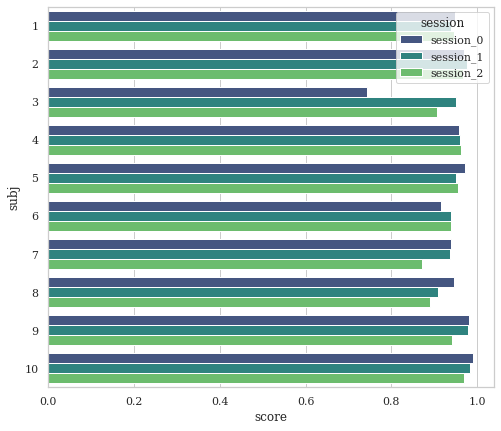

In [6]:
fig, ax = plt.subplots(figsize=(8, 7))
results["subj"] = results["subject"].apply(str)
sns.barplot(
    x="score", y="subj", hue="session", data=results, orient="h", palette="viridis", ax=ax
)
fig.show()